<a href="https://colab.research.google.com/github/mousa-rashdan/a1/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Data Analysis

In [2]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load customer data
customer_file_path = "customer(1).csv"
customer_data = pd.read_csv(customer_file_path)

# Display the first few rows of the dataset
customer_data.head()


,ID,Income,Kids,Teens,Age,Divorced,Married,Single,Together,Widow,Basic,Graduate,Master,PhD,State
0,2873,213734,0.0,0.0,75,0,0,1,0,0,0,0,0,1,State-California
1,1629,205471,0.0,0.0,50,0,0,0,1,0,0,1,0,0,State-Texas
2,1239,202692,0.0,0.0,46,1,0,0,0,0,0,1,0,0,State-Texas
3,1191,202160,0.0,0.0,43,0,0,0,1,0,0,0,0,1,State-Texas
4,1116,201970,0.0,0.0,37,0,0,1,0,0,0,1,0,0,State-Florida


## Basic Information About the Dataset

In [3]:

# Display dataset information and summary statistics
customer_data.info()
customer_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2220 non-null   int64  
 1   Income    2220 non-null   int64  
 2   Kids      2220 non-null   float64
 3   Teens     2220 non-null   float64
 4   Age       2220 non-null   int64  
 5   Divorced  2220 non-null   int64  
 6   Married   2220 non-null   int64  
 7   Single    2220 non-null   int64  
 8   Together  2220 non-null   int64  
 9   Widow     2220 non-null   int64  
 10  Basic     2220 non-null   int64  
 11  Graduate  2220 non-null   int64  
 12  Master    2220 non-null   int64  
 13  PhD       2220 non-null   int64  
 14  State     2220 non-null   object 
dtypes: float64(2), int64(12), object(1)
memory usage: 260.3+ KB


,ID,Income,Kids,Teens,Age,Divorced,Married,Single,Together,Widow,Basic,Graduate,Master,PhD
count,2220.00000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000
mean,2110.50000,151551.352703,0.443288,0.507883,50.991892,0.104054,0.387387,0.217117,0.257207,0.034234,0.024324,0.505405,0.165315,0.215766
std,641.00312,21158.647966,0.538625,0.545212,12.039065,0.305399,0.487263,0.412376,0.437193,0.181871,0.154089,0.500083,0.371549,0.411445
min,1001.00000,0.000000,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1555.75000,135233.500000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2110.50000,151400.500000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2665.25000,168179.500000,1.000000,1.000000,61.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3220.00000,213734.000000,2.000000,2.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [4]:

# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values if necessary (example: filling with median or dropping rows)
# Uncomment below to fill missing values with median
# customer_data.fillna(customer_data.median(), inplace=True)


Missing Values:
 ID          0
Income      0
Kids        0
Teens       0
Age         0
Divorced    0
Married     0
Single      0
Together    0
Widow       0
Basic       0
Graduate    0
Master      0
PhD         0
State       0
dtype: int64


## Data Visualization

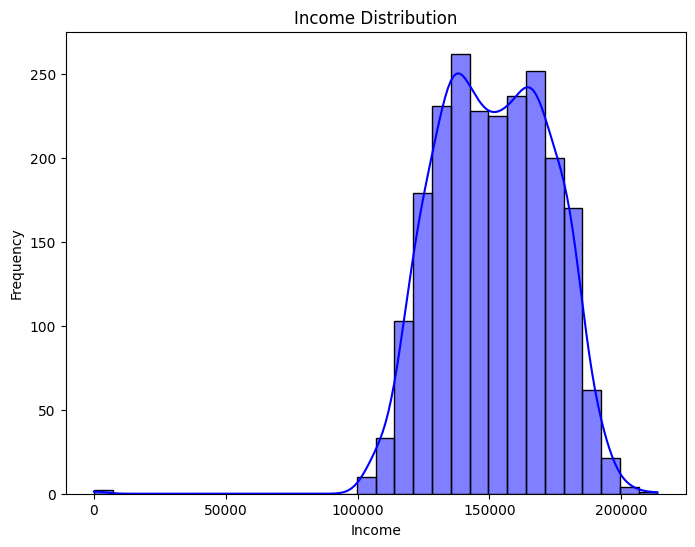

In [5]:

# Visualize income distribution
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['Income'], kde=True, bins=30, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


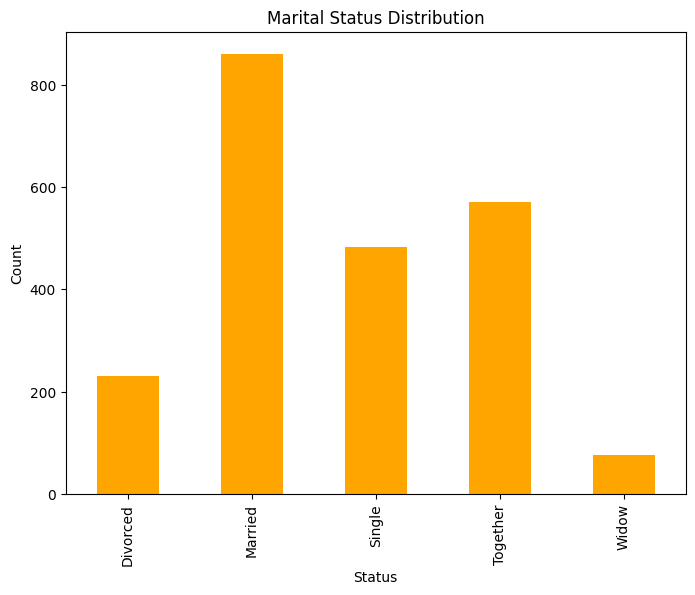

In [6]:

# Analyze marital status distribution
marital_status = customer_data[['Divorced', 'Married', 'Single', 'Together', 'Widow']].sum()
plt.figure(figsize=(8, 6))
marital_status.plot(kind='bar', color='orange')
plt.title('Marital Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


<ipython-input-7-32a8bcf46621>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Total_Children', data=customer_data, palette='viridis')


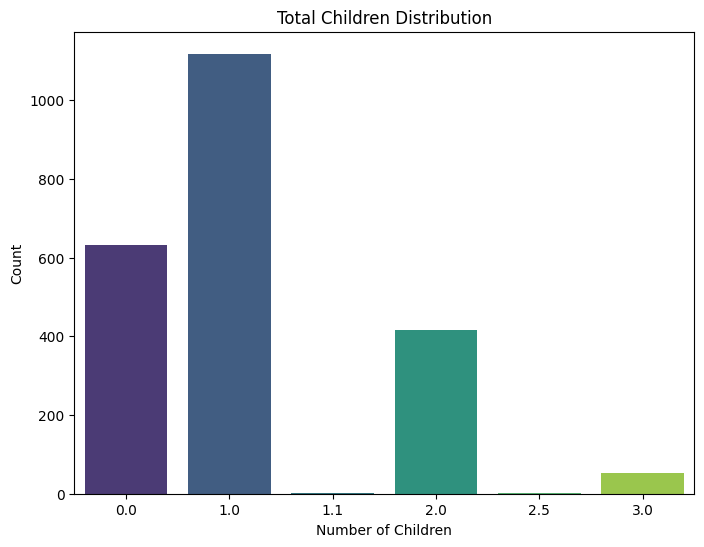

In [7]:

# Visualize number of children (Kids + Teens)
customer_data['Total_Children'] = customer_data['Kids'] + customer_data['Teens']
plt.figure(figsize=(8, 6))
sns.countplot(x='Total_Children', data=customer_data, palette='viridis')
plt.title('Total Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


## Conclusion

This notebook provides basic insights into the customer data. You can extend it by adding more specific analyses, such as customer segmentation or predictive modeling.